In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("musk_csv.csv")

In [3]:
df.shape

(6598, 170)

In [4]:
df.head()

,ID,molecule_name,conformation_name,f1,f2,f3,f4,f5,f6,f7,...,f158,f159,f160,f161,f162,f163,f164,f165,f166,class
0,1,MUSK-211,211_1+1,46,-108,-60,-69,-117,49,38,...,-308,52,-7,39,126,156,-50,-112,96,1
1,2,MUSK-211,211_1+10,41,-188,-145,22,-117,-6,57,...,-59,-2,52,103,136,169,-61,-136,79,1
2,3,MUSK-211,211_1+11,46,-194,-145,28,-117,73,57,...,-134,-154,57,143,142,165,-67,-145,39,1
3,4,MUSK-211,211_1+12,41,-188,-145,22,-117,-7,57,...,-60,-4,52,104,136,168,-60,-135,80,1
4,5,MUSK-211,211_1+13,41,-188,-145,22,-117,-7,57,...,-60,-4,52,104,137,168,-60,-135,80,1


In [5]:
# see if duplicate values exists 
df.conformation_name.value_counts()
# hence no duplicate values
# this column is of no use for later use

252_1+87      1
252_1+128     1
j146_2+33     1
252_2+282     1
287_2+18      1
             ..
192_1+76      1
j147_2+119    1
326_3+11      1
251_2+25      1
197_1+239     1
Name: conformation_name, Length: 6598, dtype: int64

In [6]:
# find the frequencies of different class
# find the 
# this shows that data is not evenly distributed 
df['class'].value_counts()

0    5581
1    1017
Name: class, dtype: int64

In [7]:
# new data frame with only necessary columns
data = df.drop(['molecule_name', 'ID', 'conformation_name', 'class'], axis = 1)
labels = df['class']

In [8]:
data.head()

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,...,f157,f158,f159,f160,f161,f162,f163,f164,f165,f166
0,46,-108,-60,-69,-117,49,38,-161,-8,5,...,-244,-308,52,-7,39,126,156,-50,-112,96
1,41,-188,-145,22,-117,-6,57,-171,-39,-100,...,-235,-59,-2,52,103,136,169,-61,-136,79
2,46,-194,-145,28,-117,73,57,-168,-39,-22,...,-238,-134,-154,57,143,142,165,-67,-145,39
3,41,-188,-145,22,-117,-7,57,-170,-39,-99,...,-236,-60,-4,52,104,136,168,-60,-135,80
4,41,-188,-145,22,-117,-7,57,-170,-39,-99,...,-236,-60,-4,52,104,137,168,-60,-135,80


In [9]:
len(data.columns)

166

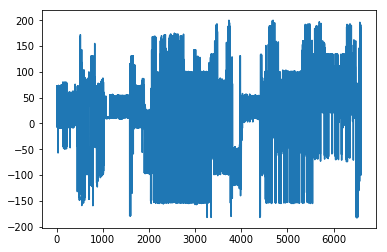

In [10]:
plt.plot(data.f6)

In [11]:
# to check if null values exists in the data
data.isna().sum()
# hence no null values exists

f1      0
f2      0
f3      0
f4      0
f5      0
       ..
f162    0
f163    0
f164    0
f165    0
f166    0
Length: 166, dtype: int64

## scaling the data

In [12]:
from sklearn import preprocessing
data = preprocessing.StandardScaler().fit_transform(data)

C:\Users\uru\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\uru\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [13]:
data

array([[-0.24312408,  0.12255207,  0.19347093, ..., -0.04561267,
         0.50333227,  0.5762445 ],
       [-0.33702966, -0.7584422 , -1.05742889, ..., -0.24537589,
         0.18759789,  0.39560282],
       [-0.24312408, -0.82451677, -1.05742889, ..., -0.35433764,
         0.06919749, -0.02943645],
       ...,
       [-0.28068632,  0.18862664,  0.79684613, ..., -0.33617735,
         0.08235309, -0.50760562],
       [-0.1492185 , -0.0206095 ,  0.73798026, ...,  0.06334909,
         0.45070987,  0.79939012],
       [-0.1492185 , -0.03162193,  0.73798026, ...,  0.06334909,
         0.46386547,  0.8100161 ]])

## splitting the data

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
x = data
y = labels
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .2, stratify = y)

## Defining accuracy method

In [16]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [17]:
# method to check model
def accuracy(model):
    print("accuracy of model  -- >  ", accuracy_score(y_test, model.predict(x_test)))
    print("-----------------------\         \n")
    print("-----------------------/        \n")
    print("confusion_matrix  \n", confusion_matrix(y_test, model.predict(x_test)))
    print("-----------------------\         \n")
    print("-----------------------/        \n")
    print("report of model \n", classification_report(y_test, model.predict(x_test)))

## Random Forest

In [18]:
from sklearn.ensemble import RandomForestClassifier    

In [19]:
model = RandomForestClassifier(random_state=42)
model.fit(x_train, y_train)
accuracy(model)

C:\Users\uru\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


accuracy of model  -- >   0.9704545454545455
-----------------------\         

-----------------------/        

confusion_matrix  
 [[1110    7]
 [  32  171]]
-----------------------\         

-----------------------/        

report of model 
               precision    recall  f1-score   support

           0       0.97      0.99      0.98      1117
           1       0.96      0.84      0.90       203

   micro avg       0.97      0.97      0.97      1320
   macro avg       0.97      0.92      0.94      1320
weighted avg       0.97      0.97      0.97      1320



## multilayer perceptron

In [20]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore", category = FutureWarning)
warnings.filterwarnings("ignore", category = DeprecationWarning)
mlp = MLPClassifier()

In [21]:
parameters = {
    "hidden_layer_sizes" : [(10,2), (100,2), (50,2)],
    "activation" : ["relu", "tanh", "logistic"],
    "learning_rate" : ["constant", "invscaling", "adaptive"]
}

In [22]:
cv= GridSearchCV(mlp, parameters, cv = 5)
cv.fit(x_train, y_train)

C:\Users\uru\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\uru\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\uru\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\uru\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarni

C:\Users\uru\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\uru\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\uru\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\uru\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarni

C:\Users\uru\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\uru\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\uru\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\uru\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarni

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'hidden_layer_sizes': [(10, 2), (100, 2), (50, 2)], 'activation': ['relu', 'tanh', 'logistic'], 'learning_rate': ['constant', 'invscaling', 'adaptive']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [23]:
model = cv.best_estimator_
model.fit(x_train, y_train)
accuracy(model)

accuracy of model  -- >   0.9962121212121212
-----------------------\         

-----------------------/        

confusion_matrix  
 [[1112    5]
 [   0  203]]
-----------------------\         

-----------------------/        

report of model 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1117
           1       0.98      1.00      0.99       203

   micro avg       1.00      1.00      1.00      1320
   macro avg       0.99      1.00      0.99      1320
weighted avg       1.00      1.00      1.00      1320



In [24]:
model


MLPClassifier(activation='tanh', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(50, 2), learning_rate='adaptive',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

## Using Keras

In [25]:
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense

classifier = Sequential()
classifier.add(Dense(output_dim = 83, init = 'uniform', activation = 'relu', input_dim = 166))
classifier.add(Dense(output_dim = 40, init = 'uniform', activation = 'relu'))
classifier.add(Dense(output_dim = 20, init = 'uniform', activation = 'relu'))
classifier.add(Dense(output_dim = 1, init = 'uniform', activation = 'sigmoid'))
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

Using TensorFlow backend.







Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


C:\Users\uru\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=166, units=83, kernel_initializer="uniform")`
  import sys
C:\Users\uru\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=40, kernel_initializer="uniform")`
  
C:\Users\uru\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=20, kernel_initializer="uniform")`
  if __name__ == '__main__':
C:\Users\uru\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  # Remove the CWD from sys.path while we load stuff.


In [26]:
history = classifier.fit(x_train, y_train, epochs=100, batch_size=1000, validation_data=(x_test, y_test))    


Train on 5278 samples, validate on 1320 samples
Epoch 1/100
5278/5278 [==============================] - 0s 49us/step - loss: 0.6917 - acc: 0.7509 - val_loss: 0.6880 - val_acc: 0.8462
Epoch 2/100
5278/5278 [==============================] - 0s 4us/step - loss: 0.6845 - acc: 0.8458 - val_loss: 0.6749 - val_acc: 0.8462
Epoch 3/100
5278/5278 [==============================] - 0s 5us/step - loss: 0.6652 - acc: 0.8458 - val_loss: 0.6392 - val_acc: 0.8462
Epoch 4/100
5278/5278 [==============================] - 0s 4us/step - loss: 0.6158 - acc: 0.8458 - val_loss: 0.5572 - val_acc: 0.8462
Epoch 5/100
5278/5278 [==============================] - 0s 5us/step - loss: 0.5171 - acc: 0.8458 - val_loss: 0.4318 - val_acc: 0.8462
Epoch 6/100
5278/5278 [==============================] - 0s 4us/step - loss: 0.4041 - acc: 0.8458 - val_loss: 0.3609 - val_acc: 0.8462
Epoch 7/100
5278/5278 [==============================] - 0s 4us/step - loss: 0.3671 - acc: 0.8458 - val_loss: 0.3627 - val_acc: 0.8462
Epoch

5278/5278 [==============================] - 0s 4us/step - loss: 0.1017 - acc: 0.9970 - val_loss: 0.1100 - val_acc: 0.9841
Epoch 60/100
5278/5278 [==============================] - 0s 4us/step - loss: 0.1013 - acc: 0.9975 - val_loss: 0.1116 - val_acc: 0.9803
Epoch 61/100
5278/5278 [==============================] - 0s 4us/step - loss: 0.1006 - acc: 0.9972 - val_loss: 0.1114 - val_acc: 0.9826
Epoch 62/100
5278/5278 [==============================] - 0s 4us/step - loss: 0.1001 - acc: 0.9985 - val_loss: 0.1117 - val_acc: 0.9826
Epoch 63/100
5278/5278 [==============================] - 0s 4us/step - loss: 0.1000 - acc: 0.9977 - val_loss: 0.1090 - val_acc: 0.9848
Epoch 64/100
5278/5278 [==============================] - 0s 4us/step - loss: 0.0993 - acc: 0.9983 - val_loss: 0.1098 - val_acc: 0.9833
Epoch 65/100
5278/5278 [==============================] - 0s 4us/step - loss: 0.0988 - acc: 0.9985 - val_loss: 0.1095 - val_acc: 0.9856
Epoch 66/100
5278/5278 [==============================] - 0s 

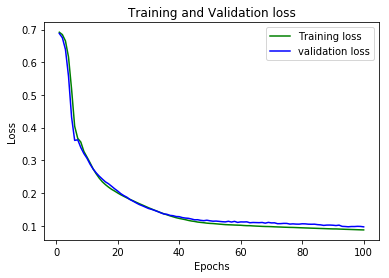

In [27]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(1,101)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

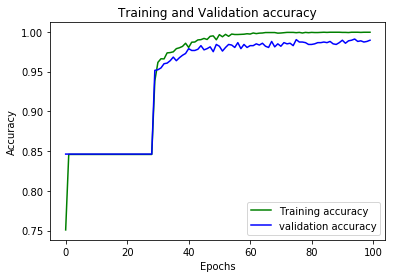

In [28]:
loss_train = history.history['acc']
loss_val = history.history['val_acc']
epochs = range(0,100)
plt.plot(epochs, loss_train, 'g', label='Training accuracy')
plt.plot(epochs, loss_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()